In [1]:
#import autosklearn.regression as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score,confusion_matrix,classification_report
import autokeras as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
import h2o
from h2o.automl import H2OAutoML
import shap
from sklearn.preprocessing import StandardScaler
from autokeras import Input, RegressionHead, AutoModel
from autokeras import RegressionHead, AutoModel
from keras.models import load_model

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv('processed_data/preprocessed_data.csv')
data.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Automatic,transmission_Semi-Auto,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric,model_encoded,brand_encoded
0,2017,12500,15735,150.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557,22896.685039
1,2016,16500,36203,20.0,64.2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22695.385027,22896.685039
2,2016,11000,29946,30.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557,22896.685039
3,2017,16800,25952,145.0,67.3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20255.450398,22896.685039
4,2019,17300,1998,145.0,49.6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17408.522032,22896.685039


In [3]:
x=data.drop('price',axis=1).values
y=data['price'].values

In [4]:
train_df,test_df=train_test_split(data,test_size=0.2,random_state=42)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
h2o.init(start_h2o=True, nthreads=-1, max_mem_size="2G", port=54321)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 22.0.1+8-16, mixed mode, sharing)
  Starting server from D:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\aishw\AppData\Local\Temp\tmpktxjkvlz
  JVM stdout: C:\Users\aishw\AppData\Local\Temp\tmpktxjkvlz\h2o_aishw_started_from_python.out
  JVM stderr: C:\Users\aishw\AppData\Local\Temp\tmpktxjkvlz\h2o_aishw_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_aishw_lzhak0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.983 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [7]:
train=h2o.H2OFrame(train_df)
test=h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
target='price'

In [9]:
features=[col for col in train.columns if col != target]

In [64]:
from h2o.estimators.xgboost import H2OXGBoostEstimator


if H2OXGBoostEstimator.available():
    print("It is available")
else:
    print('Not available')

Cannot build an XGBoost model - no backend found.
Not available


In [17]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [10]:
aml=H2OAutoML(max_models=20,seed=42)
aml.train(x=features,y=target,training_frame=train)

AutoML progress: |
10:09:06.842: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/20
# GBM base models (used / total),8/10
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/7
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [14]:
print(aml.leaderboard)

model_id                                                    rmse          mse      mae        rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20250531_100906     1816.55  3.29985e+06  1089.54    0.0946645               3.29985e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20250531_100906  1826.81  3.33723e+06  1098.02    0.0955216               3.33723e+06
GBM_4_AutoML_1_20250531_100906                           1860.79  3.46253e+06  1129.36    0.0981212               3.46253e+06
GBM_grid_1_AutoML_1_20250531_100906_model_4              1875.61  3.51791e+06  1113.04    0.0983567               3.51791e+06
DRF_1_AutoML_1_20250531_100906                           1882.71  3.54461e+06  1119.51    0.0995633               3.54461e+06
GBM_grid_1_AutoML_1_20250531_100906_model_5              1887.55  3.56286e+06  1153.86    0.0993828               3.56286e+06
GBM_3_AutoML_1_20250531_100906                           1898.39  3.60388e+06  1176.54  nan                       3.60

In [11]:
perf=aml.leader.model_performance(test_data=test)
print(f"R2 score (from H2o): {perf.r2()}")

R2 score (from H2o): 0.9683747096993095


In [12]:
predictions=aml.leader.predict(test)
print(predictions)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
  19887.1
  17451.2
  24325.4
  18680.6
  15719.6
  30599.3
  11613.4
  18433.8
  34136.6
  16751.4
[21708 rows x 1 column]



In [13]:
from sklearn.metrics import r2_score
y_true=test['price'].as_data_frame().values.flatten()
y_pred_h2o=aml.leader.predict(test).as_data_frame().values.flatten()

r2=r2_score(y_true,y_pred_h2o)
print(f"R2 score (from sklearn): {r2}")

stackedensemble prediction progress: |

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


███████████████████████████████████████████| (done) 100%
R2 score (from sklearn): 0.9683747096993096


d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [15]:
predictions_df=predictions.as_data_frame()
predictions_df

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict
0,19887.105283
1,17451.191427
2,24325.362300
3,18680.597694
4,15719.620589
...,...
21703,15547.373832
21704,9251.969469
21705,11698.689109
21706,12132.386528


In [71]:
# View the leaderboard
lb = aml.leaderboard
print(lb)

# Get the best XGBoost model (if available)
xgb_models = [model_id for model_id in lb['model_id'].as_data_frame()['model_id'] if "XGBoost" in model_id]

if xgb_models:
    xgb_model = h2o.get_model(xgb_models[0])
    shap_values = xgb_model.predict_contributions(test)
    shap_values.head()
else:
    print("No XGBoost model found in leaderboard.")


model_id                                                    rmse          mse      mae        rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20250523_180313     1816.55  3.29985e+06  1089.54    0.0946645               3.29985e+06
StackedEnsemble_BestOfFamily_1_AutoML_3_20250523_180313  1826.81  3.33723e+06  1098.02    0.0955216               3.33723e+06
GBM_4_AutoML_3_20250523_180313                           1860.79  3.46253e+06  1129.36    0.0981212               3.46253e+06
GBM_grid_1_AutoML_3_20250523_180313_model_4              1875.61  3.51791e+06  1113.04    0.0983567               3.51791e+06
DRF_1_AutoML_3_20250523_180313                           1882.71  3.54461e+06  1119.51    0.0995633               3.54461e+06
GBM_grid_1_AutoML_3_20250523_180313_model_5              1887.55  3.56286e+06  1153.86    0.0993828               3.56286e+06
GBM_3_AutoML_3_20250523_180313                           1898.39  3.60388e+06  1176.54  nan                       3.60

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


No XGBoost model found in leaderboard.


In [16]:
model_path=h2o.save_model(model=aml.leader,path='models',force=True,filename='stacked_h2o_automl_model')

## Comparing h2o model performance with XGBoost

In [6]:
xgb_model=joblib.load("models/best_xgb_model.pkl")
y_pred=xgb_model.predict(x_test)

In [13]:
aml = h2o.load_model("models/StackedEnsemble_AllModels_1_AutoML_2_20250523_92206")
y_pred_h2o=aml.predict(test).as_data_frame().values.flatten()

stackedensemble prediction progress: |

███████████████████████████████████████████| (done) 100%


d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [15]:
perf=aml.model_performance(test_data=test)
print(f"R2 score (from H2o): {perf.r2()}")

R2 score (from H2o): 0.9730859032826402


In [17]:
y_true=test['price'].as_data_frame().values.flatten()

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [18]:
print(f"R2 score (from H2o): {perf.r2()}")
print(f"r2 score (from sklearn XGBoostRegressor): {r2_score(y_true,y_pred)}")

R2 score (from H2o): 0.9730859032826402
r2 score (from sklearn XGBoostRegressor): 0.967197597026825


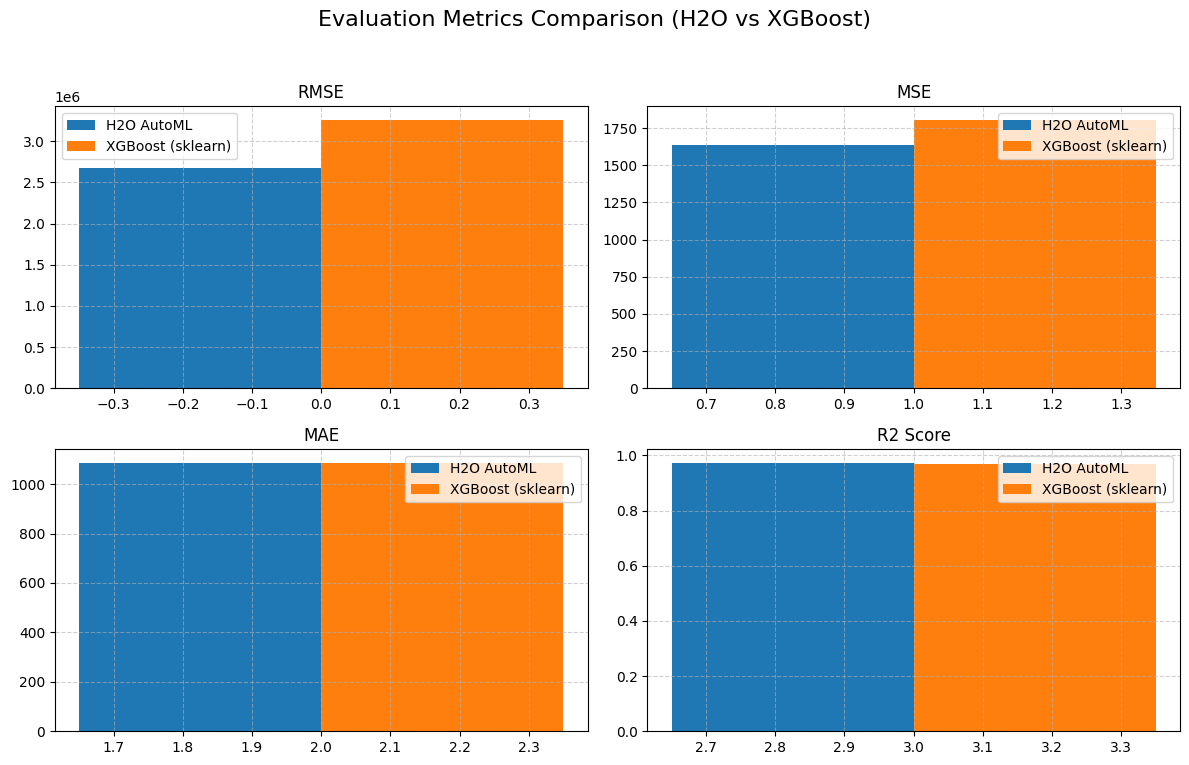

In [19]:
import matplotlib.pyplot as plt

# Scores for both models
metrics = ['RMSE', 'MSE', 'MAE', 'R2 Score']

# <---------- H2o model metrics ---------->
h2o_mse=mean_squared_error(y_true,y_pred_h2o)
h2o_rmse=root_mean_squared_error(y_true,y_pred_h2o)
h2o_mae=mean_absolute_error(y_true,y_pred_h2o)
h2o_r2=r2_score(y_true,y_pred_h2o)

# <---------- XGBoostRegressor model metrics ---------->
xgb_mse=mean_squared_error(y_true,y_pred)
xgb_rmse=root_mean_squared_error(y_true,y_pred)
xgb_mae=mean_absolute_error(y_true,y_pred)
xgb_r2=r2_score(y_true,y_pred)


h2o_scores = [h2o_mse,h2o_rmse,h2o_mae,h2o_r2]
xgb_scores = [xgb_mse, xgb_rmse, xgb_mae, xgb_r2]

# Plotting
x = np.arange(len(metrics))
bar_width = 0.35

# Plot with individual subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    axs[i].bar(x[i] - bar_width/2, h2o_scores[i], width=bar_width, label='H2O AutoML')
    axs[i].bar(x[i] + bar_width/2, xgb_scores[i], width=bar_width, label='XGBoost (sklearn)')
    axs[i].set_title(metric)
    axs[i].legend()
    axs[i].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Evaluation Metrics Comparison (H2O vs XGBoost)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## AutoKeras Regression

In [21]:
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).ravel()

In [22]:
# Define the input block and output head
input_node = ak.Input()
output_node = RegressionHead()(input_node)

# Build AutoModel
model = AutoModel(inputs=input_node, outputs=output_node, max_trials=5, overwrite=True)

# Fit the model
model.fit(x=x_train, 
          y=y_train_scaled,
          epochs=10,
          validation_data=(x_test,y_test_scaled))


Trial 5 Complete [00h 01m 58s]
val_loss: 3.408460855484009

Best val_loss So Far: 0.2895430624485016
Total elapsed time: 00h 08m 48s
Epoch 1/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 415918.9688 - mean_squared_error: 415918.9688 - val_loss: 0.4415 - val_mean_squared_error: 0.4415
Epoch 2/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 146.6036 - mean_squared_error: 146.6036 - val_loss: 0.9890 - val_mean_squared_error: 0.9890
Epoch 3/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1558.5109 - mean_squared_error: 1558.5109 - val_loss: 0.9998 - val_mean_squared_error: 0.9998
Epoch 4/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 494.6209 - mean_squared_error: 494.6209 - val_loss: 203.5345 - val_mean_squared_error: 203.5345
Epoch 5/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1463.8987 - mean_squared_error: 1463.8987 - val_loss: 6156.1797 - val_mean_squared_error: 6156.1797
Epoch 6/10
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 480.6320 

In [23]:
best = model.export_model()     
best.evaluate(x_test, y_test_scaled)

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


679/679 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3040 - mean_squared_error: 0.3040


[0.2895430624485016, 0.2895430624485016]

In [24]:
y_pred=best.predict(x_test).flatten()
print(f"R2 score: {r2_score(y_test_scaled,y_pred)}")

679/679 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
R2 score: 0.7257238644868049


In [26]:
best.save("models/best_model_autokeras.h5",save_format="tf")

In [ ]:
#Loading the model
#model = load_model("best_model.h5", custom_objects=ak.CUSTOM_OBJECTS)